In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_loan = pd.read_csv (r"C:\Build\Malware\Upgrad\Main Course\Lending Case Study\loan\loan.csv", header=0, low_memory=False)

In [4]:
data_loan.shape

(39717, 111)

In [5]:
data_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### the current loan status applicants is in the middle of paying their dues, So let's ignore them!

In [6]:
data_loan = data_loan.drop(data_loan[data_loan['loan_status'] == "Current"].index)

### Filtering necessary columns
nec_cols list holds the necessary varaibles for the analysis

In [7]:
nec_cols = [ "loan_status", "loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "grade", "sub_grade", "term", "emp_length", "annual_inc", "purpose", "total_acc", "open_acc", "home_ownership", "addr_state", "verification_status", "total_pymnt", "issue_d", "pub_rec_bankruptcies" ]
data_loan = data_loan [nec_cols]

**Now we have filtered columns from 111 to 17**

In [8]:
data_loan.shape

(38577, 19)

### Null Values & Normalizing the values

In [9]:
data_loan.isnull().sum()

loan_status                0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
grade                      0
sub_grade                  0
term                       0
emp_length              1033
annual_inc                 0
purpose                    0
total_acc                  0
open_acc                   0
home_ownership             0
addr_state                 0
verification_status        0
total_pymnt                0
issue_d                    0
pub_rec_bankruptcies     697
dtype: int64

**emp_length found to have the null values, Let's look into the value counts in order to replace the null values**

In [10]:
data_loan['emp_length'].value_counts()
data_loan['emp_length'].mode() #most common value is 10+ years, let's replace the null values as most common value

data_loan['emp_length'] = data_loan['emp_length'].fillna(data_loan['emp_length'].mode()[0])

In [11]:
data_loan.head(10)

,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,grade,sub_grade,term,emp_length,annual_inc,purpose,total_acc,open_acc,home_ownership,addr_state,verification_status,total_pymnt,issue_d,pub_rec_bankruptcies
0,Fully Paid,5000,5000,4975.0,10.65%,B,B2,36 months,10+ years,24000.0,credit_card,9,3,RENT,AZ,Verified,5863.155187,Dec-11,0.0
1,Charged Off,2500,2500,2500.0,15.27%,C,C4,60 months,< 1 year,30000.0,car,4,3,RENT,GA,Source Verified,1008.710000,Dec-11,0.0
2,Fully Paid,2400,2400,2400.0,15.96%,C,C5,36 months,10+ years,12252.0,small_business,10,2,RENT,IL,Not Verified,3005.666844,Dec-11,0.0
3,Fully Paid,10000,10000,10000.0,13.49%,C,C1,36 months,10+ years,49200.0,other,37,10,RENT,CA,Source Verified,12231.890000,Dec-11,0.0
5,Fully Paid,5000,5000,5000.0,7.90%,A,A4,36 months,3 years,36000.0,wedding,12,9,RENT,AZ,Source Verified,5632.210000,Dec-11,0.0
6,Fully Paid,7000,7000,7000.0,15.96%,C,C5,60 months,8 years,47004.0,debt_consolidation,11,7,RENT,NC,Not Verified,10110.840000,Dec-11,0.0
7,Fully Paid,3000,3000,3000.0,18.64%,E,E1,36 months,9 years,48000.0,car,4,4,RENT,CA,Source Verified,3939.135294,Dec-11,0.0
8,Charged Off,5600,5600,5600.0,21.28%,F,F2,60 months,4 years,40000.0,small_business,13,11,OWN,CA,Source Verified,646.020000,Dec-11,0.0
9,Charged Off,5375,5375,5350.0,12.69%,B,B5,60 months,< 1 year,15000.0,other,3,2,RENT,TX,Verified,1476.190000,Dec-11,0.0
10,Fully Paid,6500,6500,6500.0,14.65%,C,C3,60 months,5 years,72000.0,debt_consolidation,23,14,OWN,AZ,Not Verified,7678.017673,Dec-11,0.0


In [12]:
data_loan['emp_length'].value_counts() #Let's normalize the values to numeric since the no of years pointing out to the numerics

#Let's consider the values "10+ years" as 10, "<1 year" as 0 and other values to numeric by just slicing
data_loan['emp_length'] = data_loan['emp_length'].apply (lambda x: 0 if '<' in x else ( 10 if '+' in x else x.split()[0] ) )
data_loan['emp_length'] = data_loan['emp_length'].astype ('int64')

#Term normalizisation with slicing years
data_loan['term'] = data_loan['term'].apply (lambda x: x.split()[0])

In [13]:
data_loan.head(10)

,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,grade,sub_grade,term,emp_length,annual_inc,purpose,total_acc,open_acc,home_ownership,addr_state,verification_status,total_pymnt,issue_d,pub_rec_bankruptcies
0,Fully Paid,5000,5000,4975.0,10.65%,B,B2,36,10,24000.0,credit_card,9,3,RENT,AZ,Verified,5863.155187,Dec-11,0.0
1,Charged Off,2500,2500,2500.0,15.27%,C,C4,60,0,30000.0,car,4,3,RENT,GA,Source Verified,1008.710000,Dec-11,0.0
2,Fully Paid,2400,2400,2400.0,15.96%,C,C5,36,10,12252.0,small_business,10,2,RENT,IL,Not Verified,3005.666844,Dec-11,0.0
3,Fully Paid,10000,10000,10000.0,13.49%,C,C1,36,10,49200.0,other,37,10,RENT,CA,Source Verified,12231.890000,Dec-11,0.0
5,Fully Paid,5000,5000,5000.0,7.90%,A,A4,36,3,36000.0,wedding,12,9,RENT,AZ,Source Verified,5632.210000,Dec-11,0.0
6,Fully Paid,7000,7000,7000.0,15.96%,C,C5,60,8,47004.0,debt_consolidation,11,7,RENT,NC,Not Verified,10110.840000,Dec-11,0.0
7,Fully Paid,3000,3000,3000.0,18.64%,E,E1,36,9,48000.0,car,4,4,RENT,CA,Source Verified,3939.135294,Dec-11,0.0
8,Charged Off,5600,5600,5600.0,21.28%,F,F2,60,4,40000.0,small_business,13,11,OWN,CA,Source Verified,646.020000,Dec-11,0.0
9,Charged Off,5375,5375,5350.0,12.69%,B,B5,60,0,15000.0,other,3,2,RENT,TX,Verified,1476.190000,Dec-11,0.0
10,Fully Paid,6500,6500,6500.0,14.65%,C,C3,60,5,72000.0,debt_consolidation,23,14,OWN,AZ,Not Verified,7678.017673,Dec-11,0.0


## Normalization

In [14]:
grades = sorted (data_loan.grade.unique())
data_loan['sub_grade_sep'] = data_loan['sub_grade'].apply (lambda x: x[-1])

#Only 3 None values are there with Fully paid applciants, let's remove them in the reason of very low ratio
data_loan['home_ownership'].value_counts()
data_loan = data_loan.drop(data_loan[data_loan['home_ownership'] == "NONE"].index)

data_loan['int_rate'] = data_loan['int_rate'].apply (lambda x: x.split ('%')[0])
data_loan['int_rate'] = data_loan['int_rate'].astype ('float64')
data_loan['int_rate'].dtype

#formating the int_rate as interval parameters
data_loan['int_rate_interval'] = pd.cut (data_loan['int_rate'], bins=5, labels=['0-8%','8-12%','12-16%','16-20%','20-24%'])

#new columns as Year and Month from issue date
data_loan ['Month'] = data_loan ['issue_d'].apply (lambda x: x.split ('-')[0])
data_loan ['Year'] = data_loan ['issue_d'].apply (lambda x: x.split ('-')[1])

### Handling Outliers

#### Numerical Data/ Continuous variables

<Axes: >

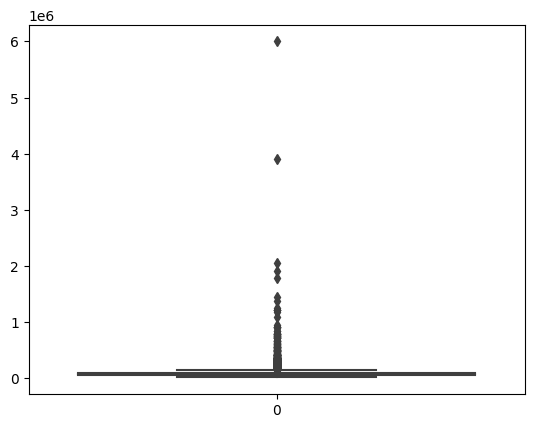

In [15]:
sns.boxplot(data_loan['annual_inc'])

The bar plot shows us there are outliers in the set, Let's clear those
<br> let's look into the quatile in close view in order to gather the drop
<br> The values after 90% seems to be dropped - Lets clear them above 85%

In [16]:
data_loan['annual_inc'].quantile ([0.5, 0.6, 0.7, 0.75, 0.8, 0.85,  0.9, 0.95])

0.50     58860.28
0.60     65004.00
0.70     75000.00
0.75     82000.00
0.80     90000.00
0.85    100000.00
0.90    115000.00
0.95    140004.00
Name: annual_inc, dtype: float64

In [17]:
data_loan = data_loan [data_loan['annual_inc'] < data_loan['annual_inc'].quantile(0.90) ]

#removing rows having greater than 90% of annual_inc

In [18]:
data_loan.head(10)

,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,grade,sub_grade,term,emp_length,annual_inc,...,home_ownership,addr_state,verification_status,total_pymnt,issue_d,pub_rec_bankruptcies,sub_grade_sep,int_rate_interval,Month,Year
0,Fully Paid,5000,5000,4975.0,10.65,B,B2,36,10,24000.0,...,RENT,AZ,Verified,5863.155187,Dec-11,0.0,2,8-12%,Dec,11
1,Charged Off,2500,2500,2500.0,15.27,C,C4,60,0,30000.0,...,RENT,GA,Source Verified,1008.710000,Dec-11,0.0,4,12-16%,Dec,11
2,Fully Paid,2400,2400,2400.0,15.96,C,C5,36,10,12252.0,...,RENT,IL,Not Verified,3005.666844,Dec-11,0.0,5,12-16%,Dec,11
3,Fully Paid,10000,10000,10000.0,13.49,C,C1,36,10,49200.0,...,RENT,CA,Source Verified,12231.890000,Dec-11,0.0,1,12-16%,Dec,11
5,Fully Paid,5000,5000,5000.0,7.90,A,A4,36,3,36000.0,...,RENT,AZ,Source Verified,5632.210000,Dec-11,0.0,4,0-8%,Dec,11
6,Fully Paid,7000,7000,7000.0,15.96,C,C5,60,8,47004.0,...,RENT,NC,Not Verified,10110.840000,Dec-11,0.0,5,12-16%,Dec,11
7,Fully Paid,3000,3000,3000.0,18.64,E,E1,36,9,48000.0,...,RENT,CA,Source Verified,3939.135294,Dec-11,0.0,1,16-20%,Dec,11
8,Charged Off,5600,5600,5600.0,21.28,F,F2,60,4,40000.0,...,OWN,CA,Source Verified,646.020000,Dec-11,0.0,2,20-24%,Dec,11
9,Charged Off,5375,5375,5350.0,12.69,B,B5,60,0,15000.0,...,RENT,TX,Verified,1476.190000,Dec-11,0.0,5,8-12%,Dec,11
10,Fully Paid,6500,6500,6500.0,14.65,C,C3,60,5,72000.0,...,OWN,AZ,Not Verified,7678.017673,Dec-11,0.0,3,12-16%,Dec,11


<Axes: >

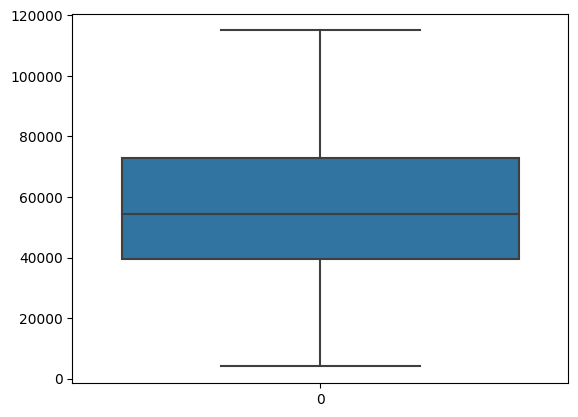

In [19]:
sns.boxplot (data_loan['annual_inc'])

<Axes: >

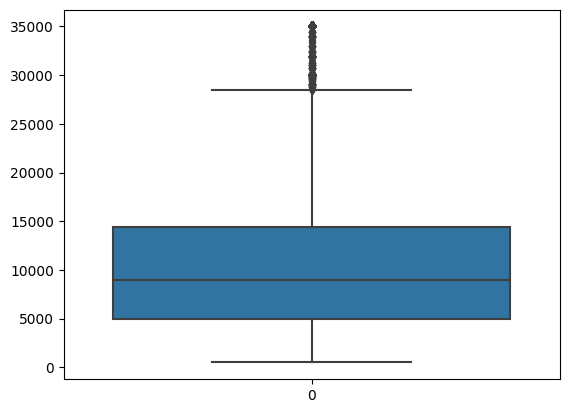

In [20]:
sns.boxplot (data_loan.loan_amnt)

<Axes: >

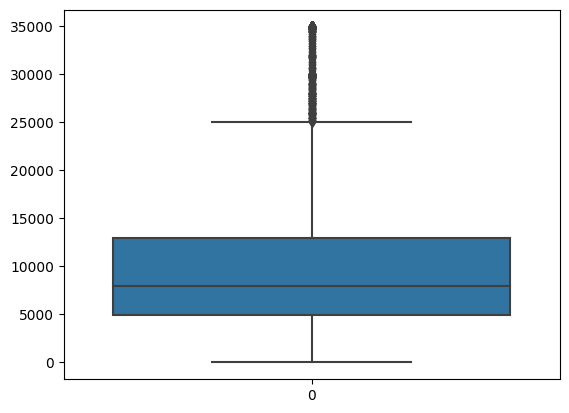

In [21]:
sns.boxplot (data_loan.funded_amnt_inv)

Note: Two of the above fund related variables having drop distribution, although the the values were continuous - let's keep as it is

In [22]:
data_loan['loan_amnt_int'] = pd.cut(data_loan['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000+'])

In [23]:
data_loan.loan_amnt_int.value_counts()

loan_amnt_int
5000-10000     11925
0-5000          9093
10000-15000     6881
15000-20000     3721
20000-25000     2063
25000+           472
Name: count, dtype: int64

In [24]:
#considering min value of 4000 let's start with the same
data_loan ['annual_inc_int'] = pd.cut (data_loan['annual_inc'], [0, 15000, 30000, 45000, 60000, 75000, 200000], labels = ['0-15000', '15000-30000', '30000-45000', '45000-60000', '60000- 75000', '75000+'])

In [25]:
data_loan.head(10)

,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,grade,sub_grade,term,emp_length,annual_inc,...,verification_status,total_pymnt,issue_d,pub_rec_bankruptcies,sub_grade_sep,int_rate_interval,Month,Year,loan_amnt_int,annual_inc_int
0,Fully Paid,5000,5000,4975.0,10.65,B,B2,36,10,24000.0,...,Verified,5863.155187,Dec-11,0.0,2,8-12%,Dec,11,0-5000,15000-30000
1,Charged Off,2500,2500,2500.0,15.27,C,C4,60,0,30000.0,...,Source Verified,1008.710000,Dec-11,0.0,4,12-16%,Dec,11,0-5000,15000-30000
2,Fully Paid,2400,2400,2400.0,15.96,C,C5,36,10,12252.0,...,Not Verified,3005.666844,Dec-11,0.0,5,12-16%,Dec,11,0-5000,0-15000
3,Fully Paid,10000,10000,10000.0,13.49,C,C1,36,10,49200.0,...,Source Verified,12231.890000,Dec-11,0.0,1,12-16%,Dec,11,5000-10000,45000-60000
5,Fully Paid,5000,5000,5000.0,7.90,A,A4,36,3,36000.0,...,Source Verified,5632.210000,Dec-11,0.0,4,0-8%,Dec,11,0-5000,30000-45000
6,Fully Paid,7000,7000,7000.0,15.96,C,C5,60,8,47004.0,...,Not Verified,10110.840000,Dec-11,0.0,5,12-16%,Dec,11,5000-10000,45000-60000
7,Fully Paid,3000,3000,3000.0,18.64,E,E1,36,9,48000.0,...,Source Verified,3939.135294,Dec-11,0.0,1,16-20%,Dec,11,0-5000,45000-60000
8,Charged Off,5600,5600,5600.0,21.28,F,F2,60,4,40000.0,...,Source Verified,646.020000,Dec-11,0.0,2,20-24%,Dec,11,5000-10000,30000-45000
9,Charged Off,5375,5375,5350.0,12.69,B,B5,60,0,15000.0,...,Verified,1476.190000,Dec-11,0.0,5,8-12%,Dec,11,5000-10000,0-15000
10,Fully Paid,6500,6500,6500.0,14.65,C,C3,60,5,72000.0,...,Not Verified,7678.017673,Dec-11,0.0,3,12-16%,Dec,11,5000-10000,60000- 75000


## Visualization

Text(0.5, 1.0, 'Distribution on Loan amount and Funded Amount')

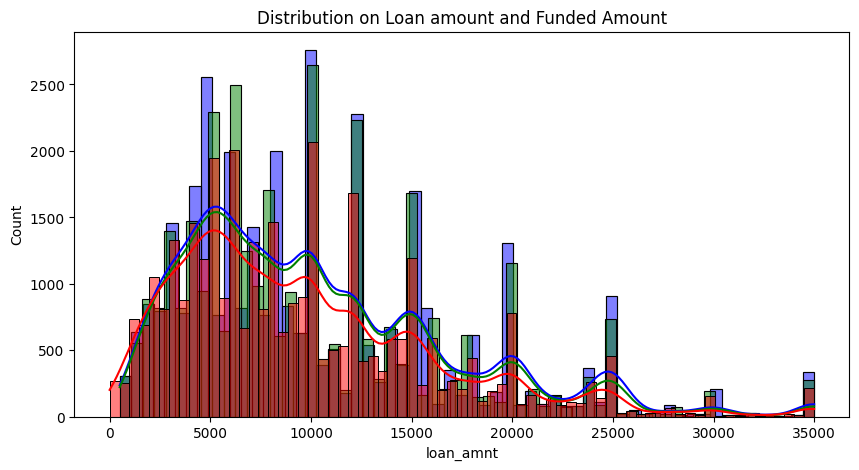

In [26]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data_loan['loan_amnt'], kde=True, color='blue')
ax = sns.histplot(data_loan['funded_amnt'], kde=True, color='green')
ax = sns.histplot (data_loan['funded_amnt_inv'], kde=True, color='red')
plt.title ("Distribution on Loan amount and Funded Amount")


**Notes:**<br>
All the variables have almost similar values

### Univariate Analysis on continuous variables

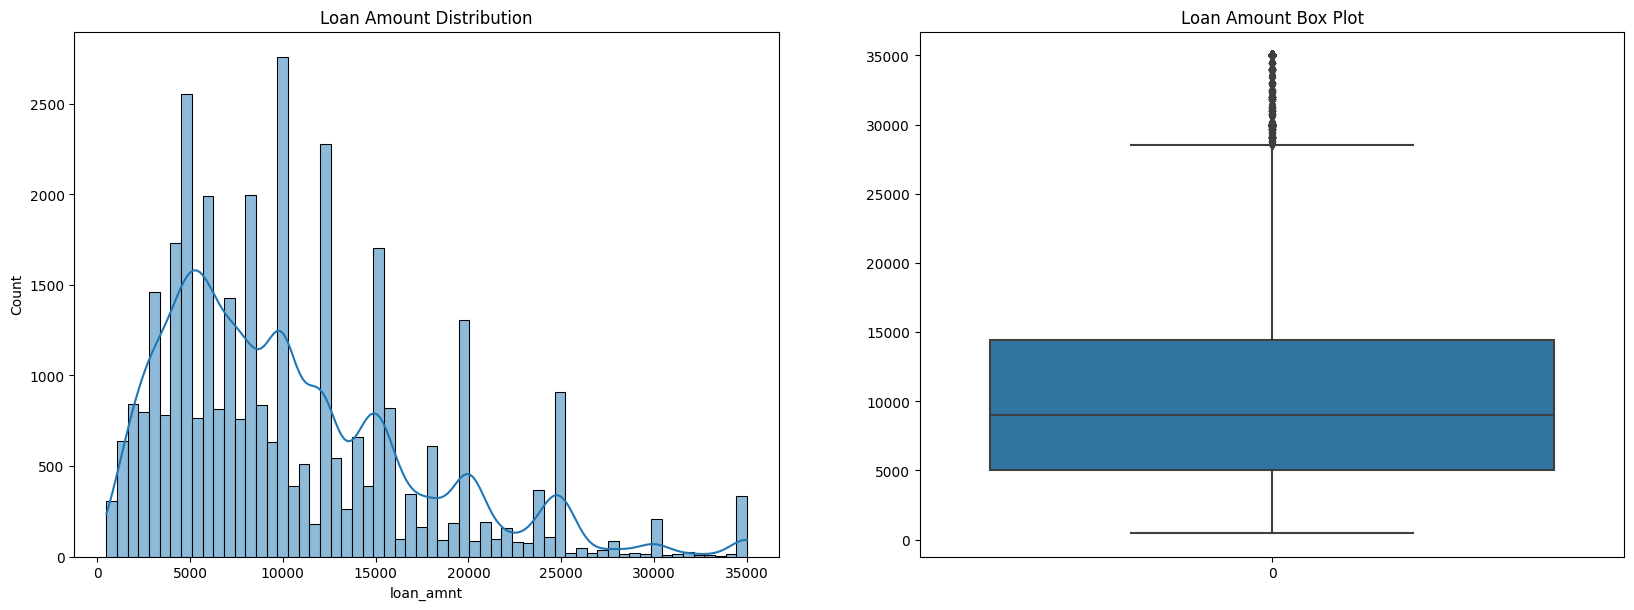

In [27]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
ax = sns.histplot (data_loan['loan_amnt'], kde=True)
plt.title ("Loan Amount Distribution")

plt.subplot(2, 2, 2)
sns.boxplot (data_loan.loan_amnt)
plt.title ("Loan Amount Box Plot")
plt.show()

*Notes:*<br>
Most of the loans were given between 5000 to 15000

#### Univariate Analysis on Interest Rate 

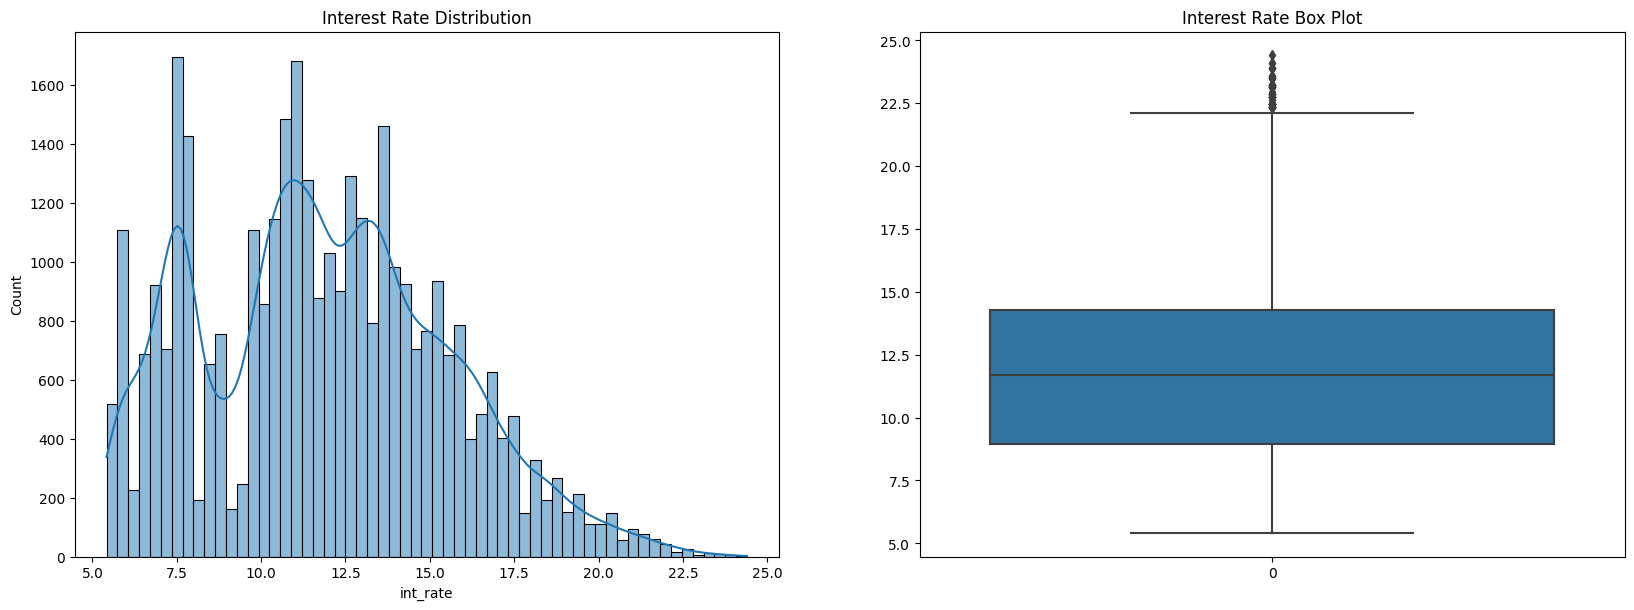

In [28]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
ax = sns.histplot (data_loan['int_rate'], kde=True)
plt.title ("Interest Rate Distribution")

plt.subplot(2, 2, 2)
sns.boxplot (data_loan.int_rate)
plt.title ("Interest Rate Box Plot")
plt.show()

*Notes:*<br>
Interest rate ratio is high between 10.0% to 15.0%

#### Univariate Analysis on Annual Income

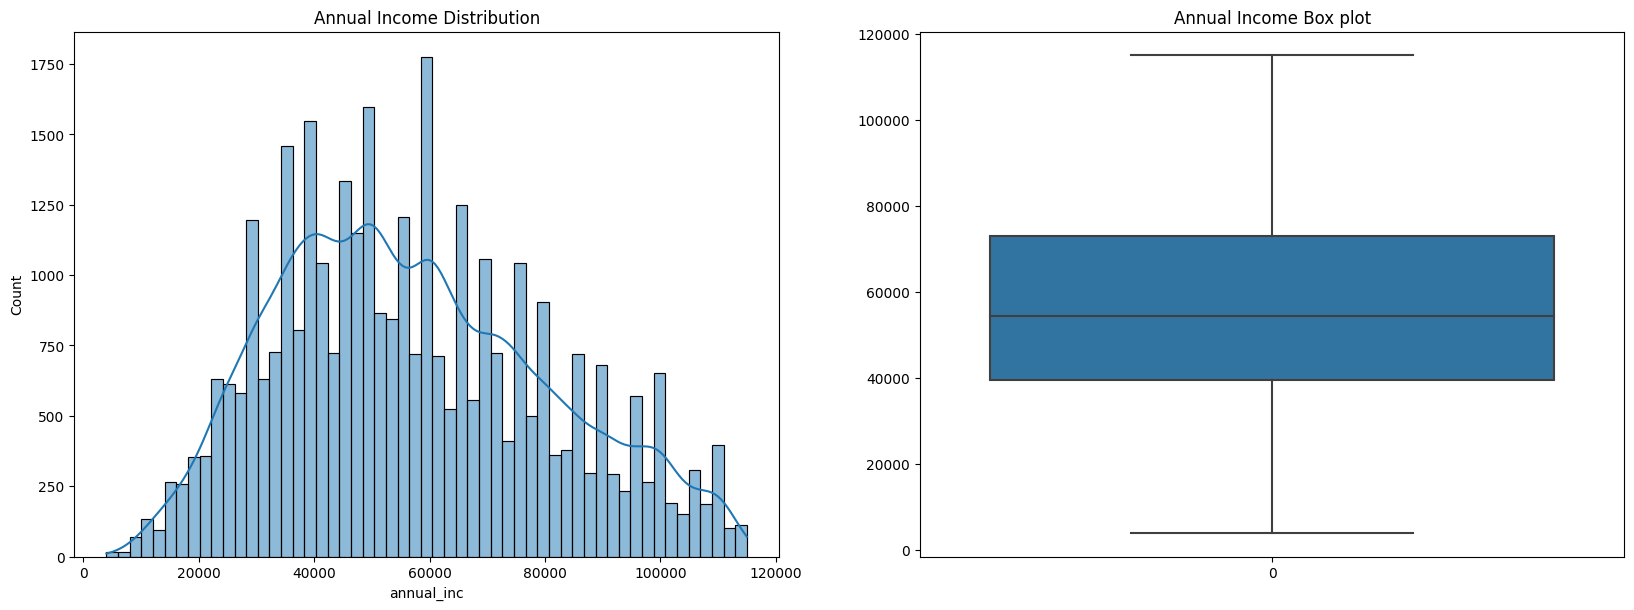

In [29]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
ax = sns.histplot (data_loan['annual_inc'], kde=True)
plt.title ("Annual Income Distribution")

plt.subplot(2, 2, 2)
sns.boxplot (data_loan.annual_inc)
plt.title ("Annual Income Box plot")
plt.show()

*Notes:*<br>
Most of the borrowers earns Annual Income as 40K to 70-75K 

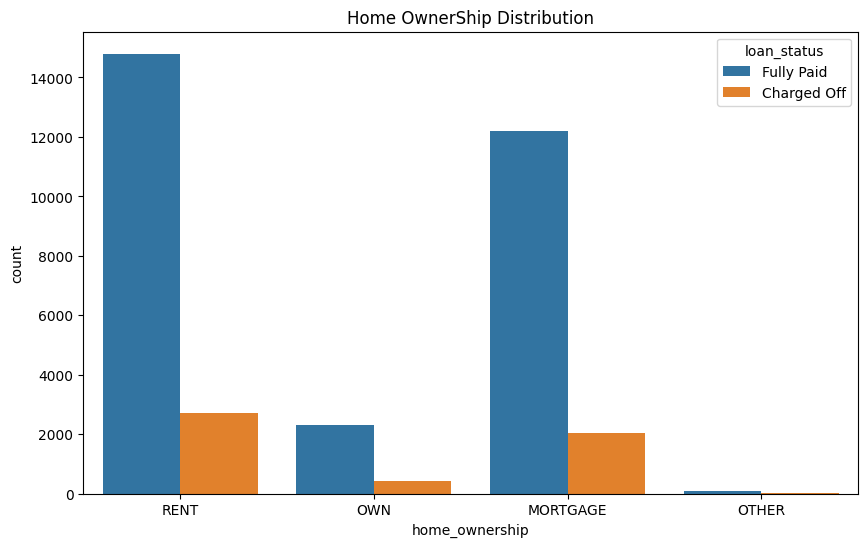

In [30]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="home_ownership",data = data_loan,hue='loan_status')
plt.title ("Home OwnerShip Distribution")
plt.show()

*Notes:*<br>
Applicants mostly from Rented and Mortage, another important thing is that the defaulters also mostly from these two categories

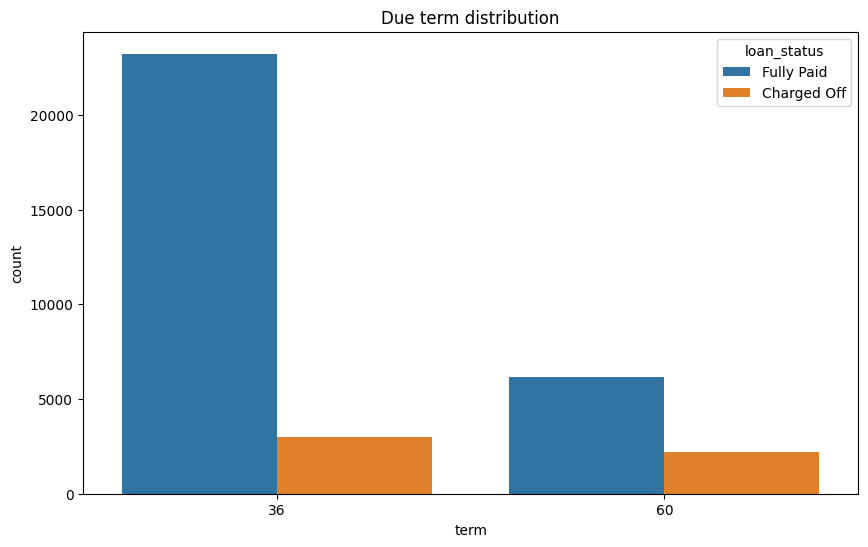

In [31]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data = data_loan,hue='loan_status')
plt.title ("Due term distribution")
plt.show()

*Notes:*<br>
Most of the applicants applied for the loan in the term of 36 months is high, whereas charged-off values were similar to each terms

## Bivariate Analysis

In [32]:
data_grp_inc = data_loan.groupby(['annual_inc_int', 'loan_status']).loan_status.value_counts().unstack().reset_index()
data_grp_inc['Total_Loans'] = data_grp_inc["Charged Off"] + data_grp_inc["Fully Paid"]
data_grp_inc["Defaulters %"] = round (data_grp_inc["Charged Off"] / data_grp_inc ['Total_Loans'] * 100, 2)


In [33]:
data_grp_inc

loan_status,annual_inc_int,Charged Off,Fully Paid,Total_Loans,Defaulters %
0,0-15000,121,374,495,24.44
1,15000-30000,718,3337,4055,17.71
2,30000-45000,1328,6548,7876,16.86
3,45000-60000,1313,7221,8534,15.39
4,60000- 75000,819,5277,6096,13.44
5,75000+,885,6634,7519,11.77


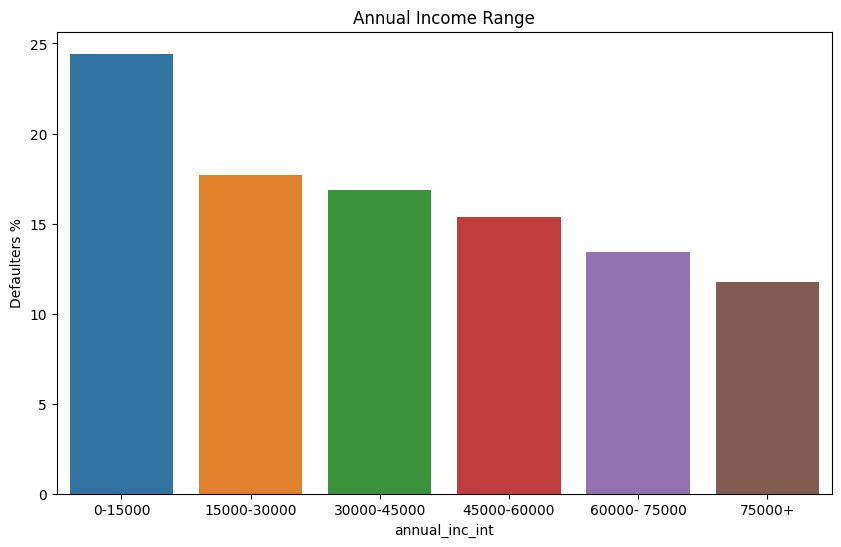

In [34]:
plt.figure(figsize=(10,6))
sns.barplot (x=data_grp_inc ['annual_inc_int'], y=data_grp_inc['Defaulters %'])
plt.title ("Annual Income Range")
plt.show()

*Notes:*</br>
<li>Borrowers earning 0 to 15000 annually has a highest rate of Defaulters</li>
<li>Borrowers earning more than 75+ are likely to be not defaulters</li>

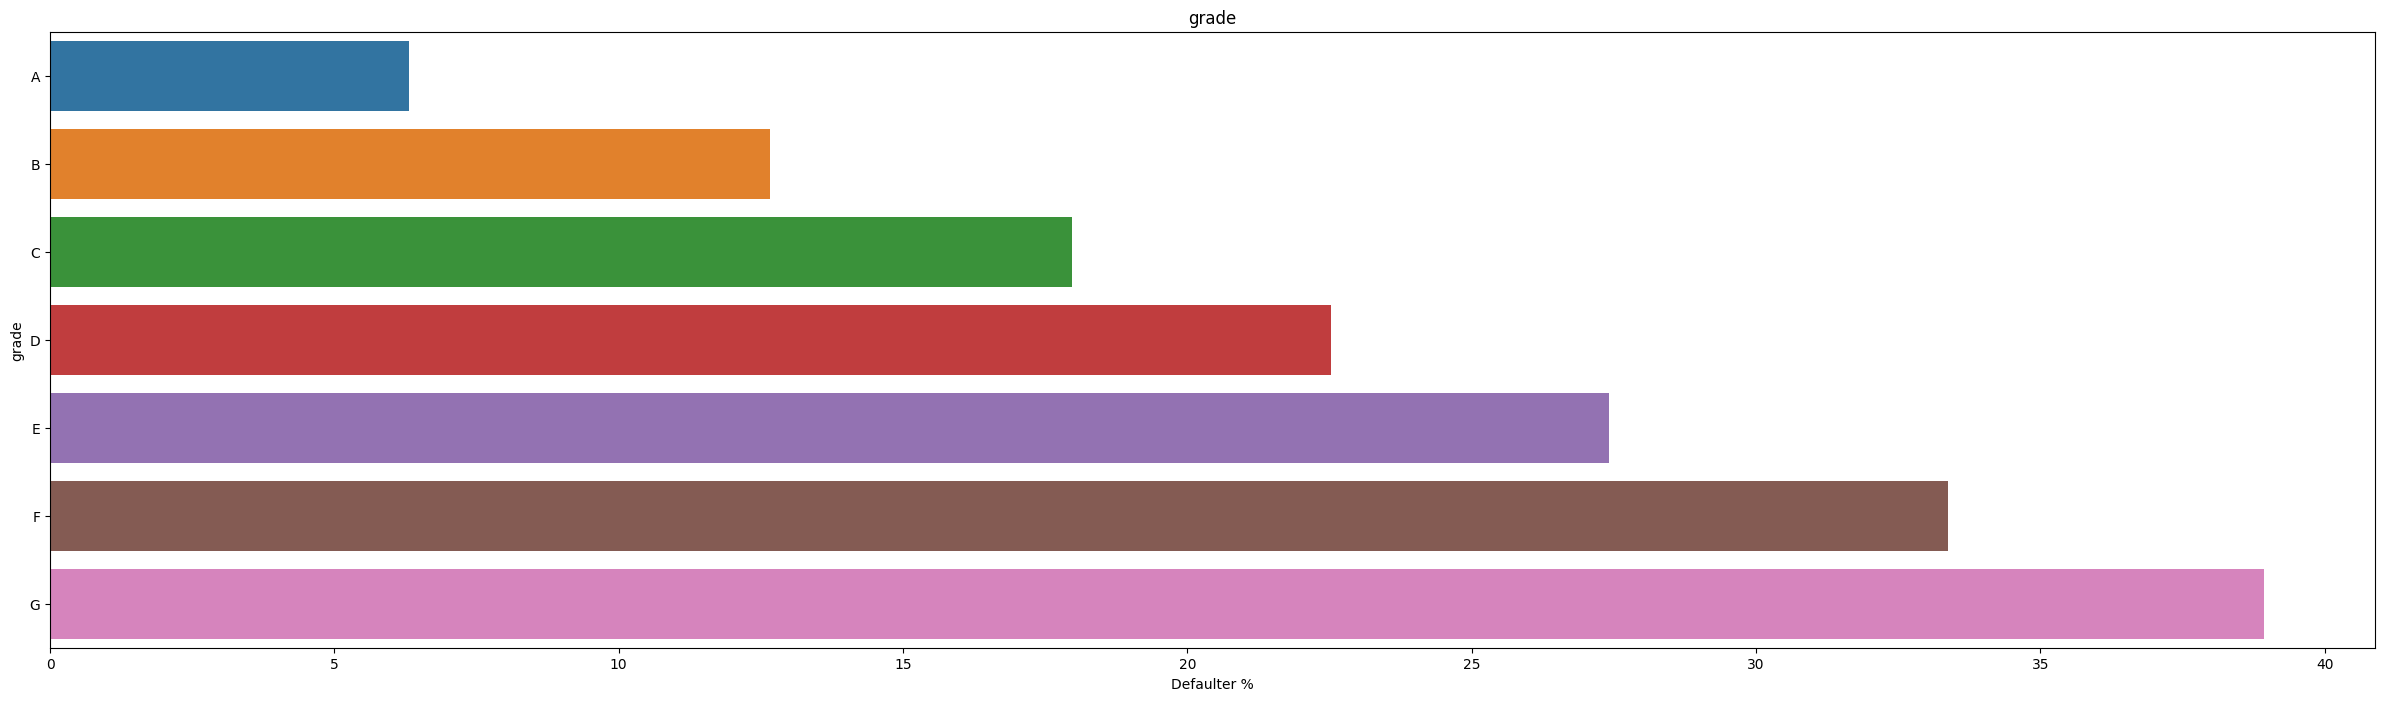

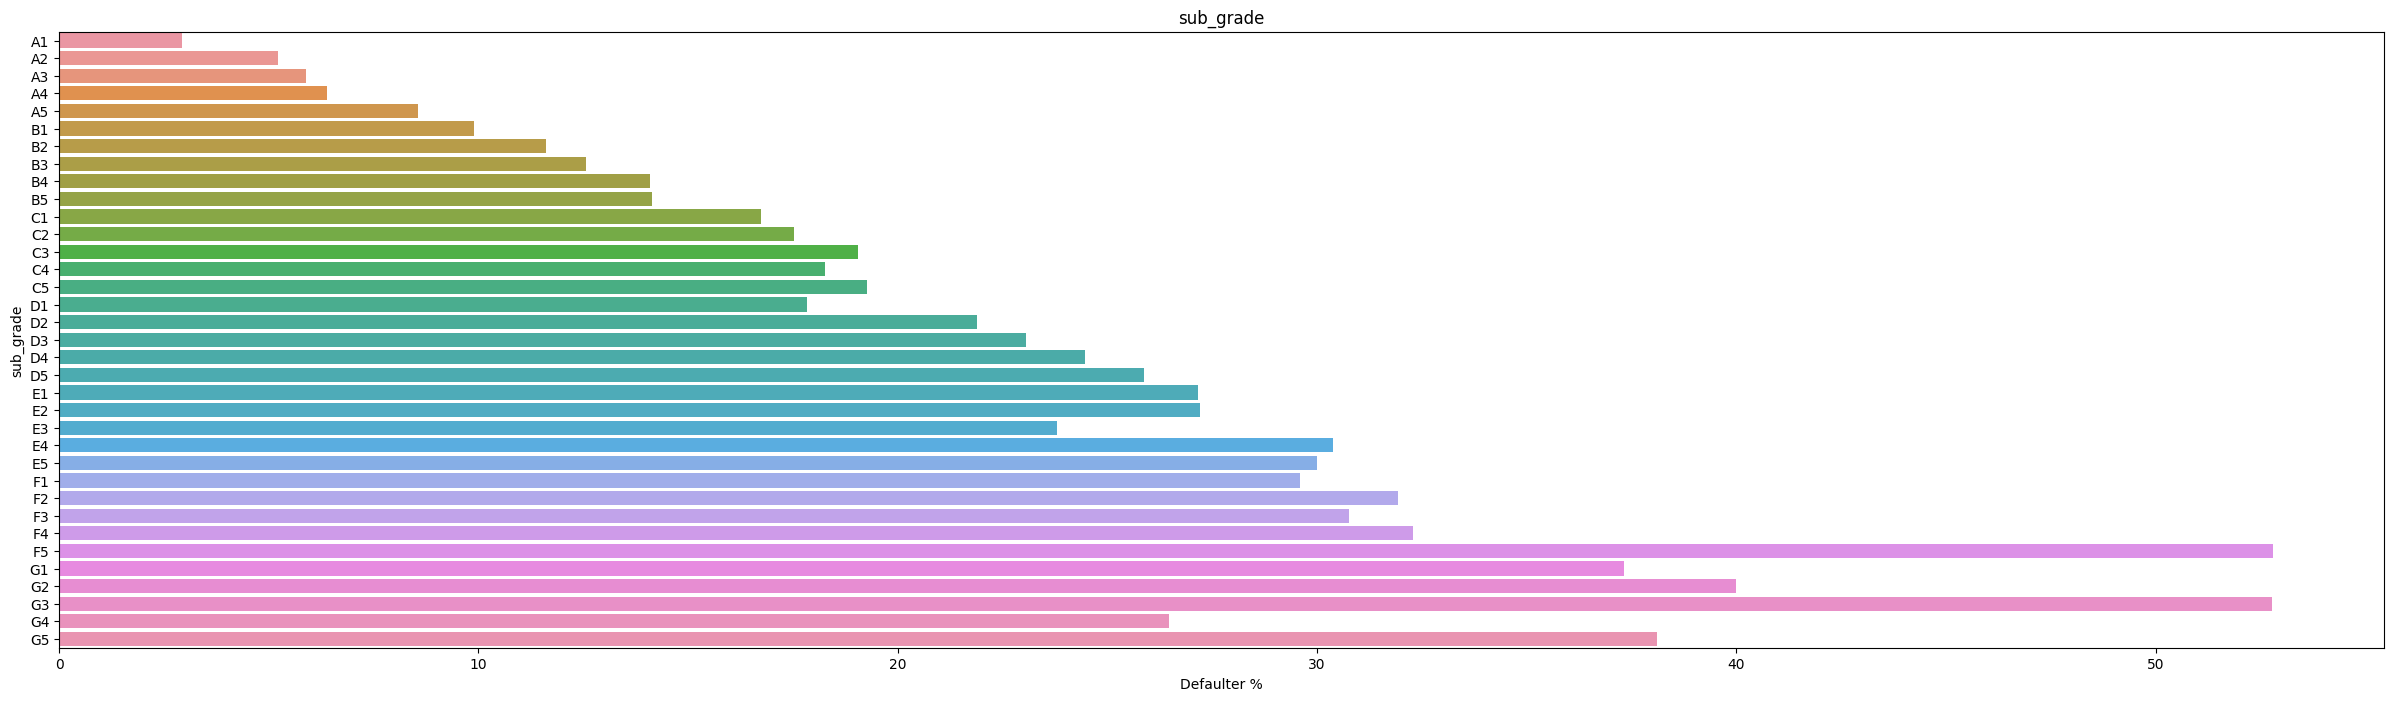

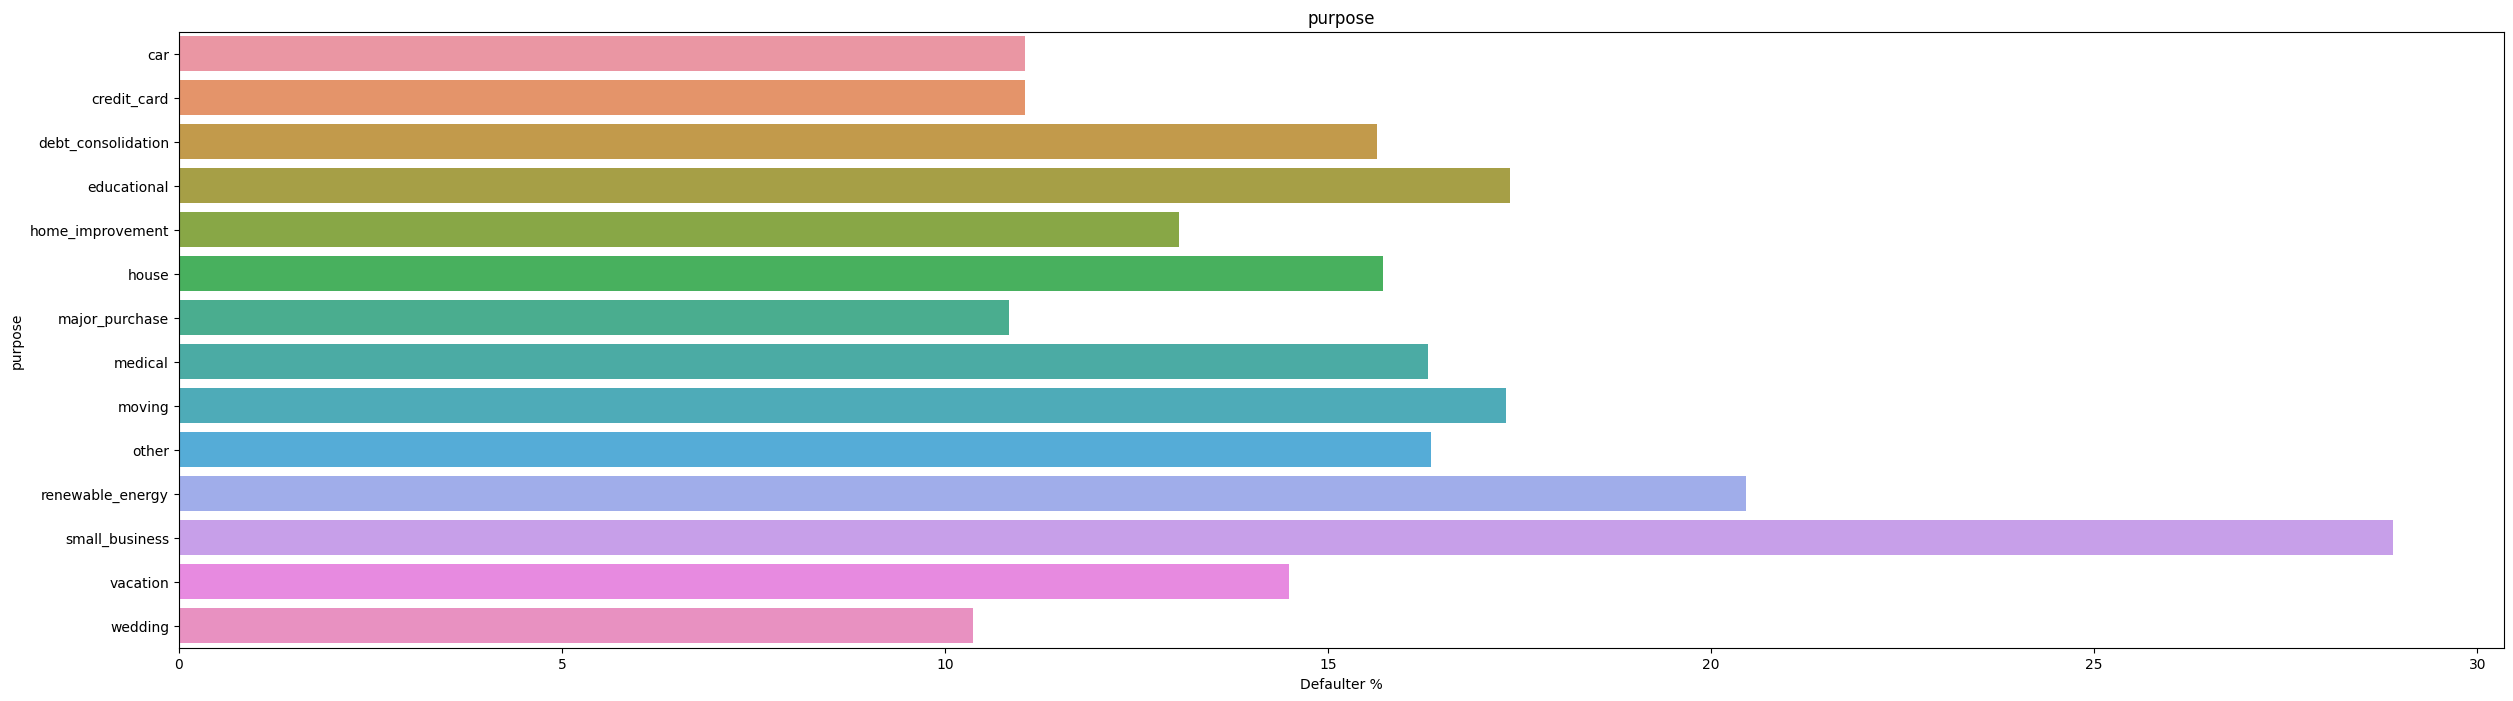

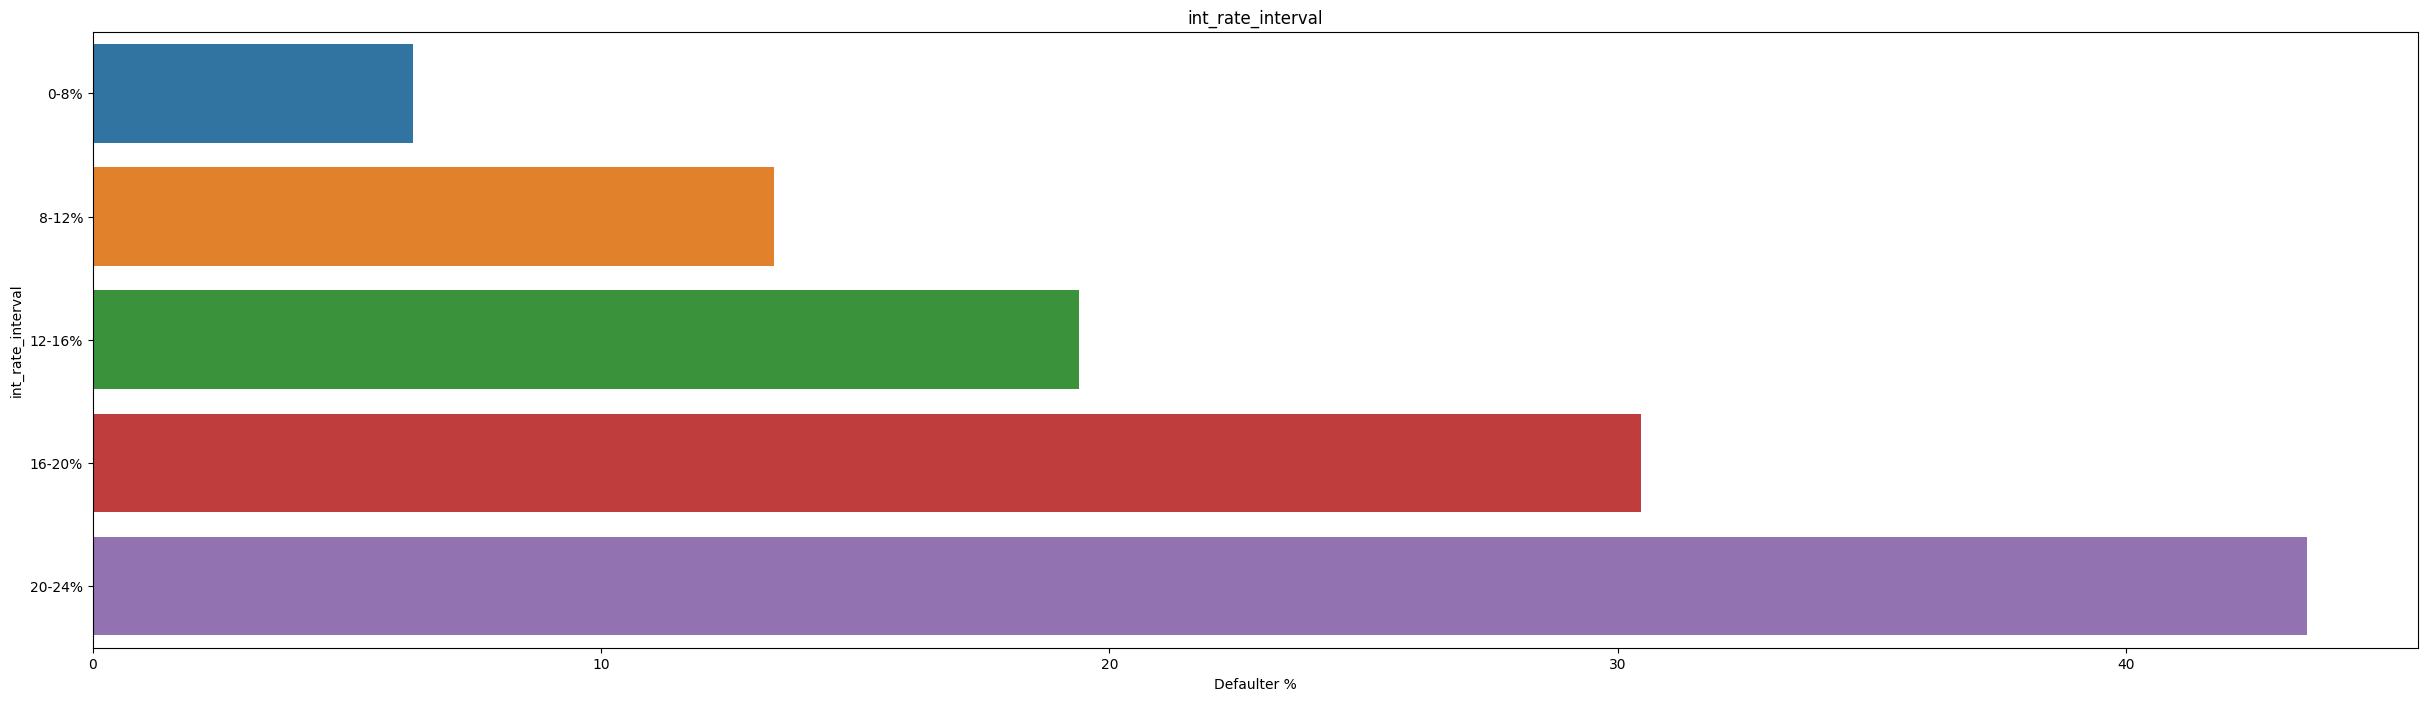

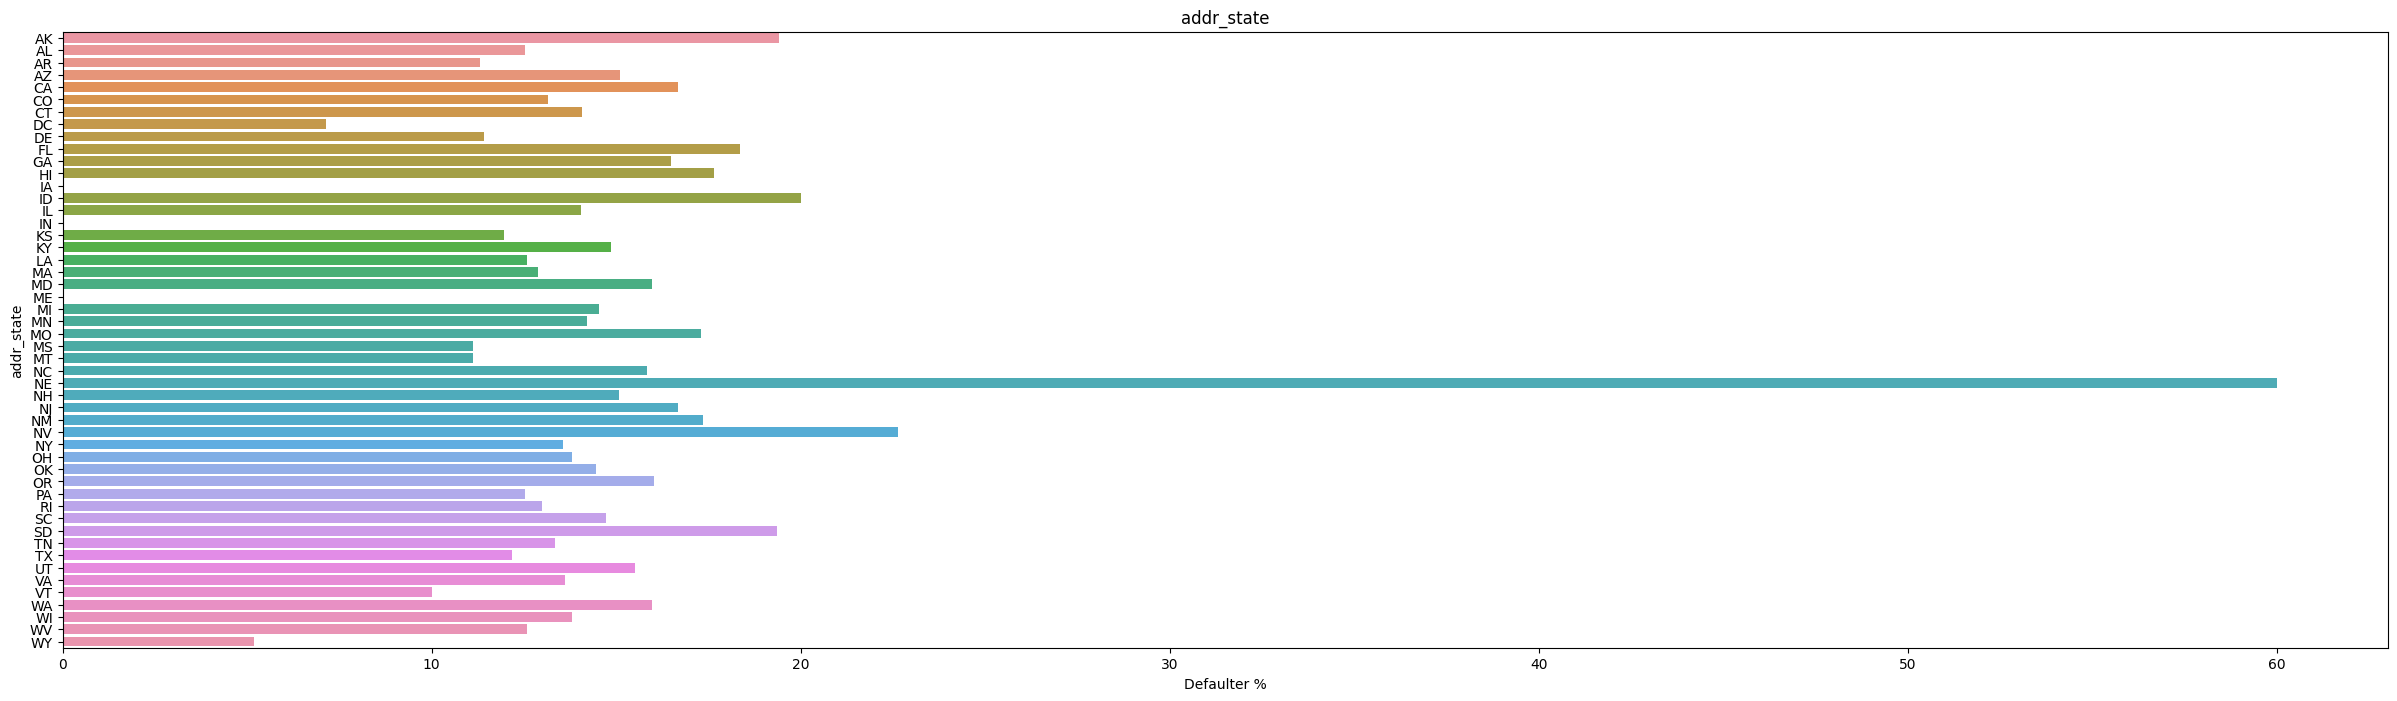

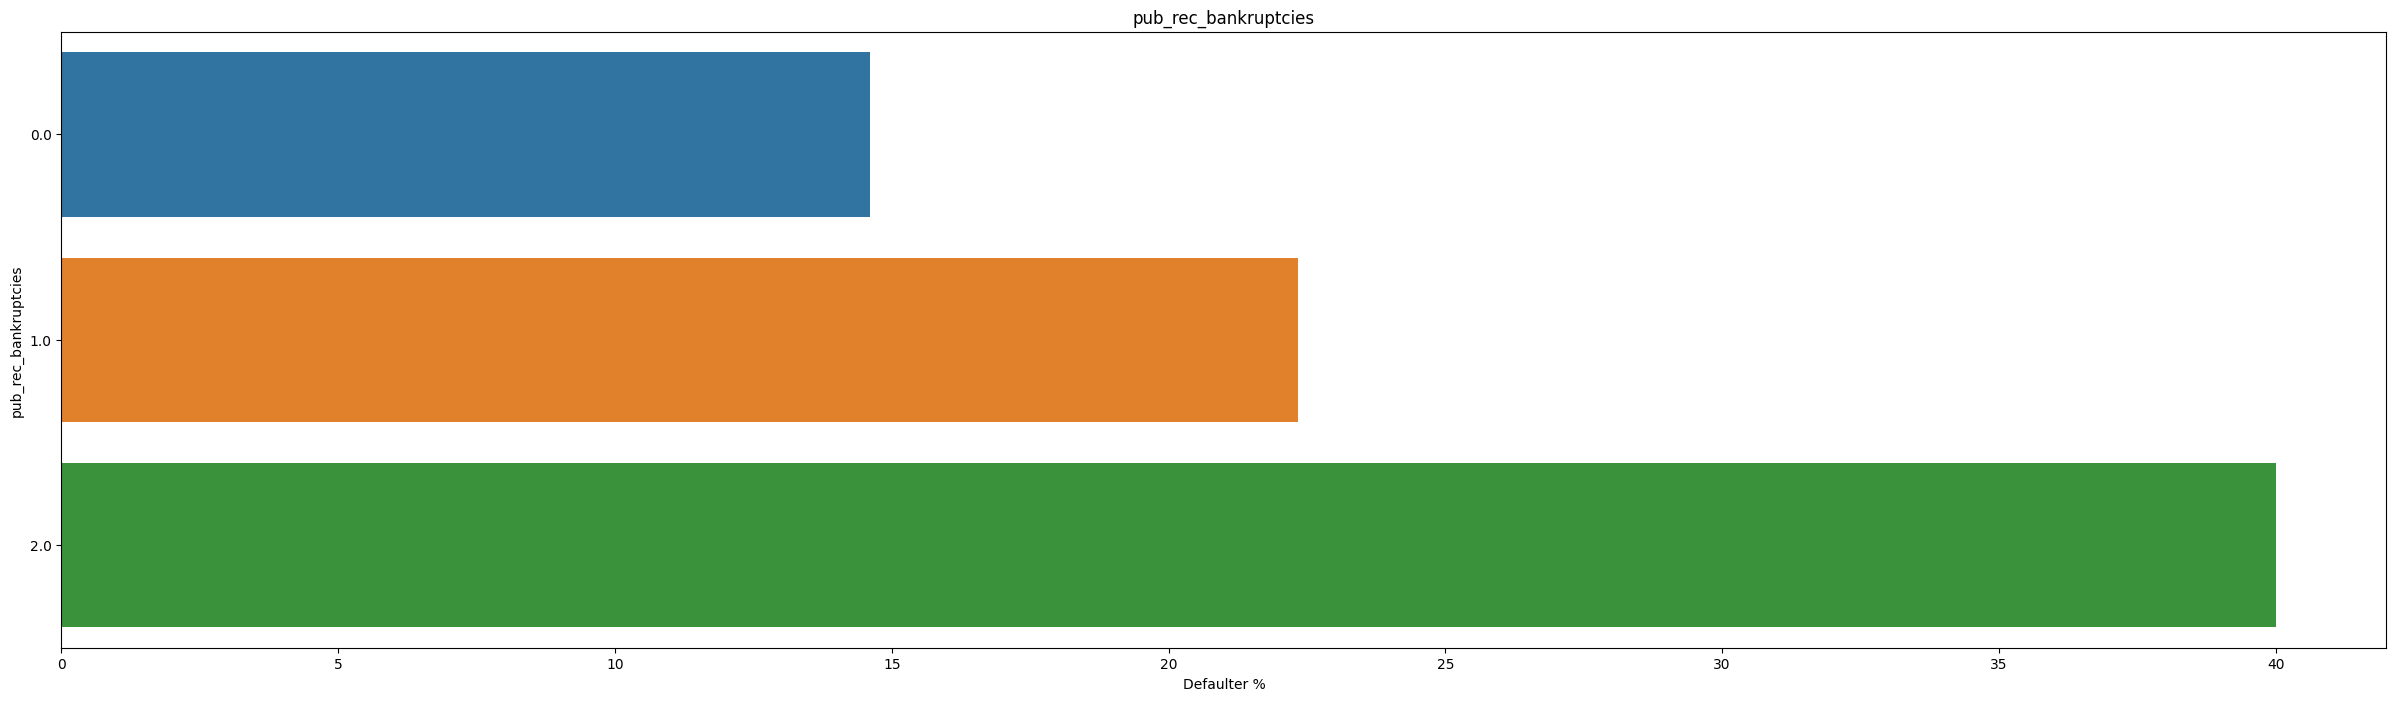

In [35]:
grp_grade = data_loan.groupby(['grade', 'loan_status']).loan_status.value_counts().unstack().reset_index()

grp_sgrade = data_loan.groupby(['sub_grade', 'loan_status']).loan_status.value_counts().unstack().reset_index()

grp_purpose = data_loan.groupby(['purpose', 'loan_status']).loan_status.value_counts().unstack().reset_index()

grp_int_rate_int = data_loan.groupby(['int_rate_interval', 'loan_status']).loan_status.value_counts().unstack().reset_index()

grp_addr = data_loan.groupby(['addr_state', 'loan_status']).loan_status.value_counts().unstack().reset_index()

grp_bank_rup = data_loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.value_counts().unstack().reset_index()

#grp_emp_length = data_loan.groupby(['emp_length', 'loan_status']).loan_status.value_counts().unstack().reset_index()

data_grp_list = [grp_grade, grp_sgrade, grp_purpose, grp_int_rate_int, grp_addr, grp_bank_rup]

for elem in data_grp_list:
    elem["Total"] = elem["Charged Off"] + elem["Fully Paid"]
    elem["Defaulter %"] = round (elem ["Charged Off"] / elem ["Total"] * 100, 2)
    plt.figure(figsize=(30,8))
    sns.barplot (y=elem[elem.columns[0]], x=elem['Defaulter %'], orient="h") #bar plot distribution for Bivariate analysis
    plt.title (elem.columns[0])
    plt.show()
    



*Notes:*<br>
From the above bar plot, we have observed below details, <br>
<li> Borrowers from F and G grades are the highest number of defaulters</li>
<li> Borrowers from the sub plot of F5 and G3 are the highest number of defaulters </li>
<li> The purpose for "Small business" has high rate of defaulters compare to others</li>
<li> The defaulter rate has increasing with every sub grade numbers </li>
<li> Interest rate more than 20% has the highest defaulters compare to others </li>
<li> More than 60% borrowers were from NE are the defaulters by a chance</li>
<li> No Notable things were in Verification status </li>
<li> pub_rec_bankruptcies, plot shows that borrowers are defaulters who has been defaulted before and that has ratio of more than 40%</li>

### Looking into Barplot bivaraite Analysis

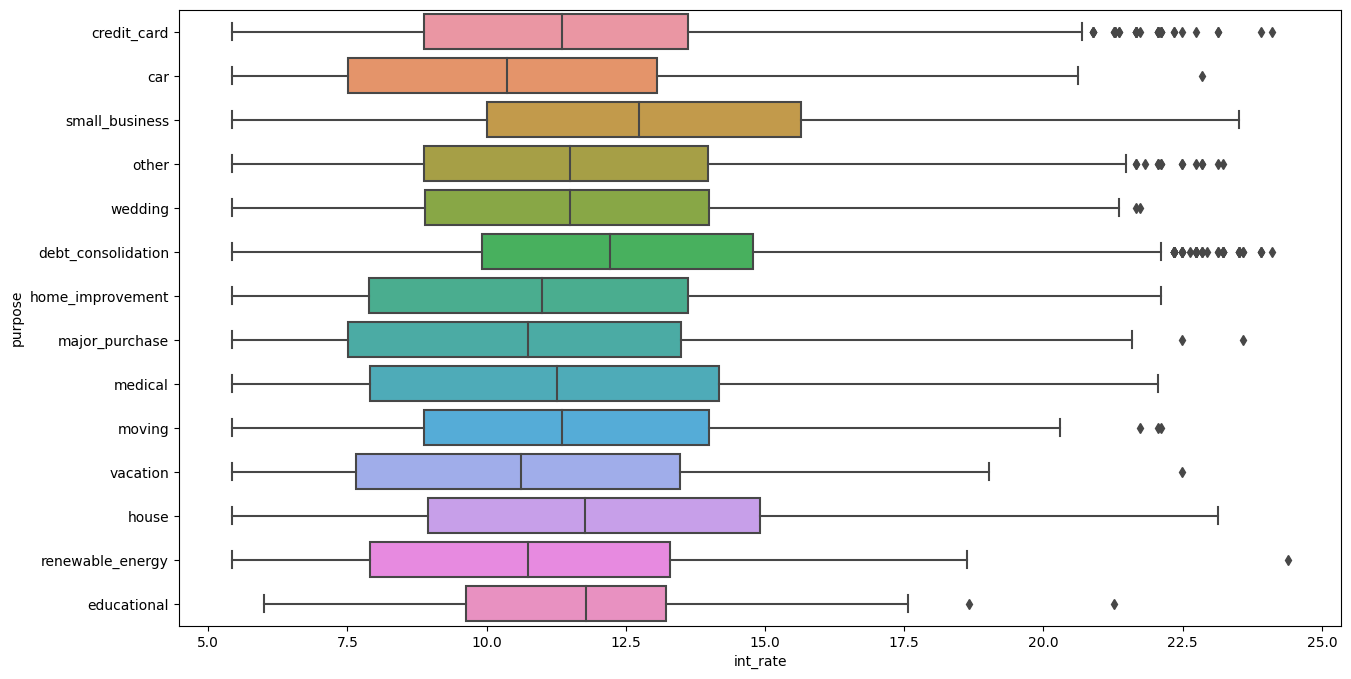

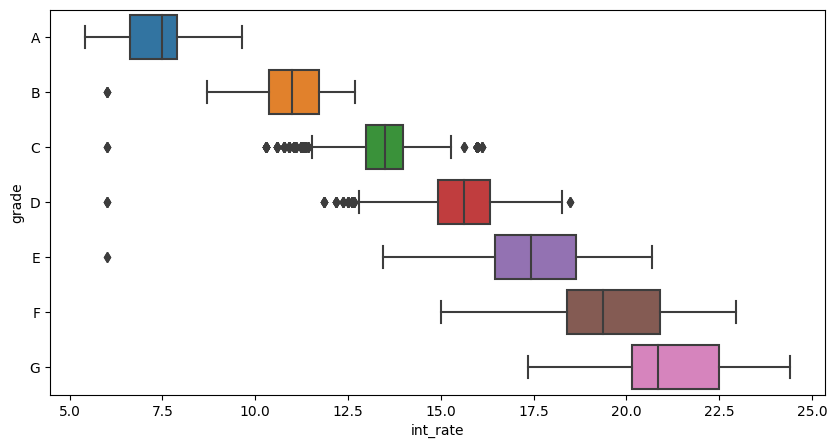

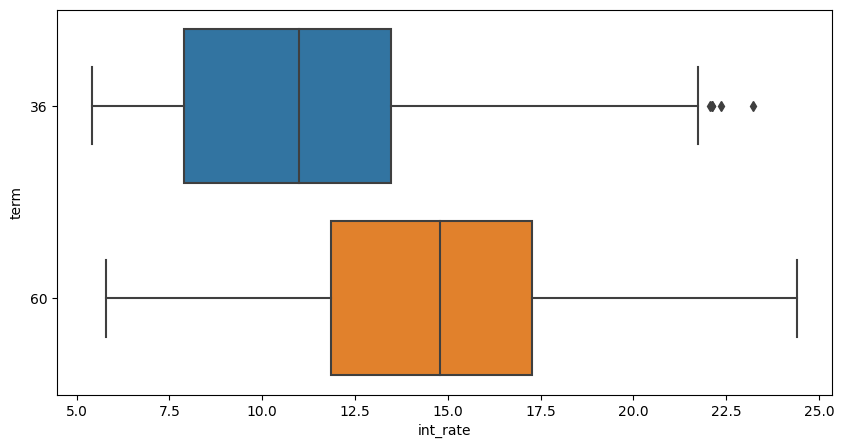

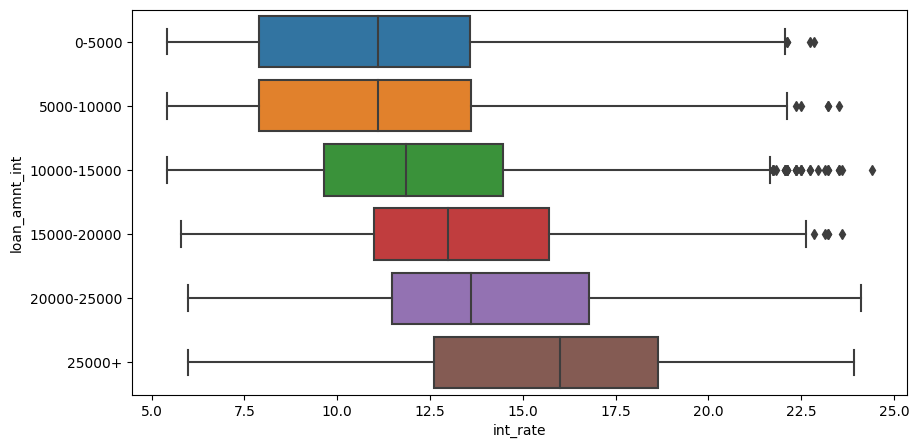

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(y='purpose', x='int_rate', data = data_loan) #Boxplot for for Bivariate analysis
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(y='grade', x='int_rate', data = data_loan, order="ABCDEFG") #Boxplot for for Bivariate analysis
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(y='term', x='int_rate', data = data_loan) #Boxplot for for Bivariate analysis
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(y='loan_amnt_int', x='int_rate', data = data_loan) #Boxplot for for Bivariate analysis
plt.show()

*Notes:*<br>
<li> pupose barplot shows us 75%, median are high in the "small_business" compare to others</li>
<li> whereas house seems to be 2nd and Credit card seems to be as 3rd line </li>
<li> Higer the term duration higher the interest rate </li>
<li> As loan amount increases. Interest rate increase </li>

<Axes: xlabel='grade', ylabel='annual_inc'>

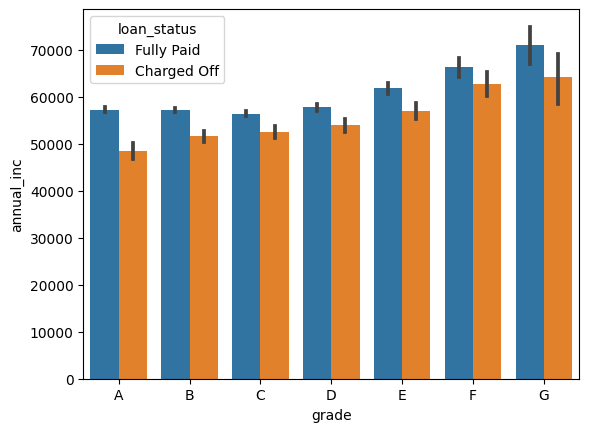

In [37]:
sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=data_loan, estimator=np.mean,order='ABCDEFG')

*Notes:*<br>
Above plot shows that the charged off borrowers were earning less annual income than the other one each

In [38]:
corr_data = data_loan [['loan_amnt', 'funded_amnt_inv', 'Year', 'annual_inc', 'int_rate']].corr()
pair_data = data_loan [['loan_amnt', 'annual_inc', 'Year','int_rate','loan_status', 'emp_length']].copy()

In [39]:
corr_data

,loan_amnt,funded_amnt_inv,Year,annual_inc,int_rate
loan_amnt,1.000000,0.936305,0.102244,0.392960,0.282202
funded_amnt_inv,0.936305,1.000000,0.249457,0.372582,0.281786
Year,0.102244,0.249457,1.000000,0.039896,0.033014
annual_inc,0.392960,0.372582,0.039896,1.000000,0.046206
int_rate,0.282202,0.281786,0.033014,0.046206,1.000000


<Axes: >

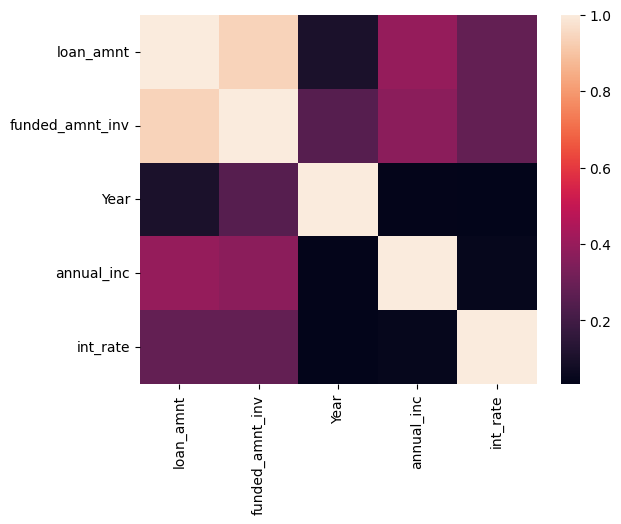

In [40]:
sns.heatmap(corr_data)

*Notes:*<br>
The more annual income, the more chance of loan amount sanctioned

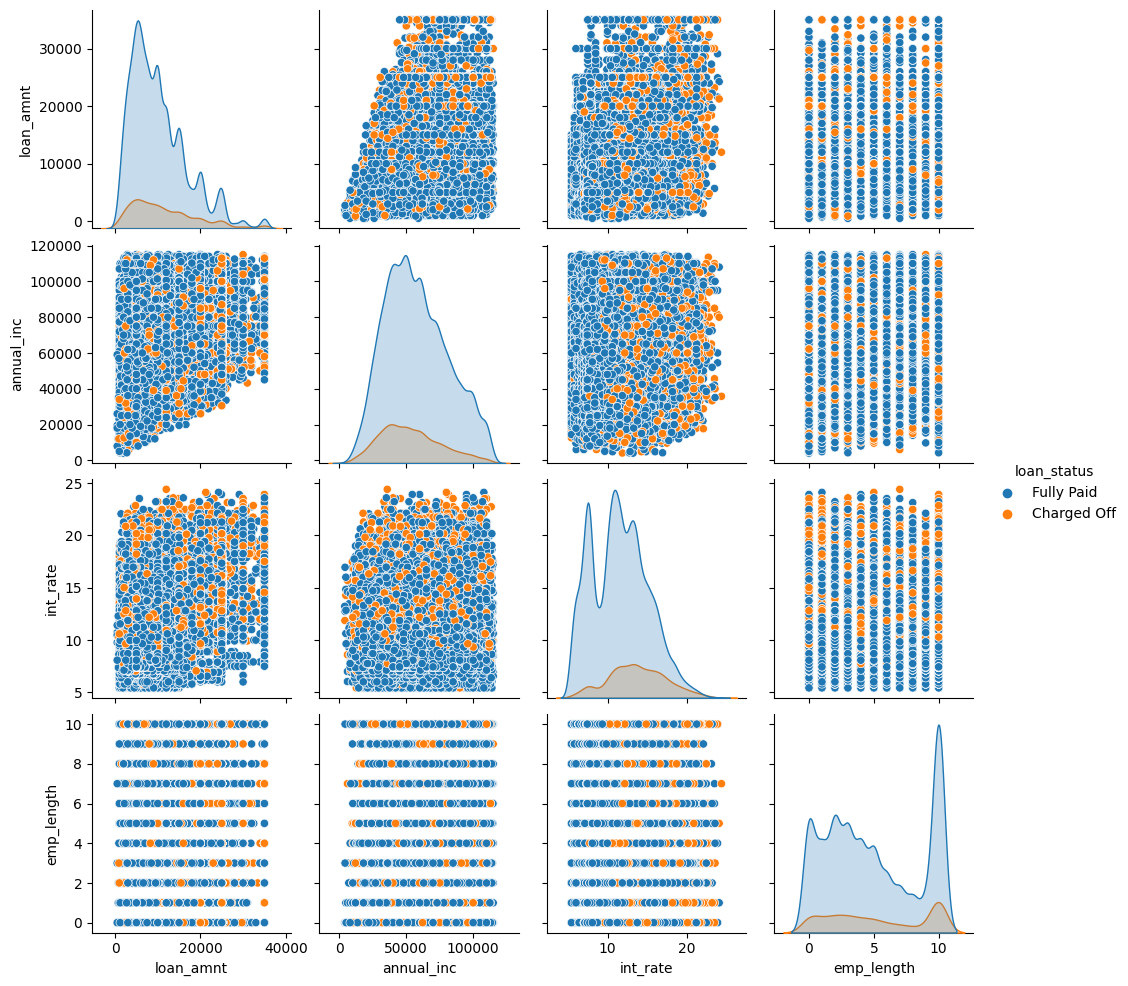

In [41]:
sns.pairplot (pair_data, hue = 'loan_status')

*Notes:*<br>
<li> As the Loan amount increases, Interest rate increase </li>
<li> As annual income increases, Loan amount increase </li>

<Axes: xlabel='loan_status', ylabel='int_rate'>

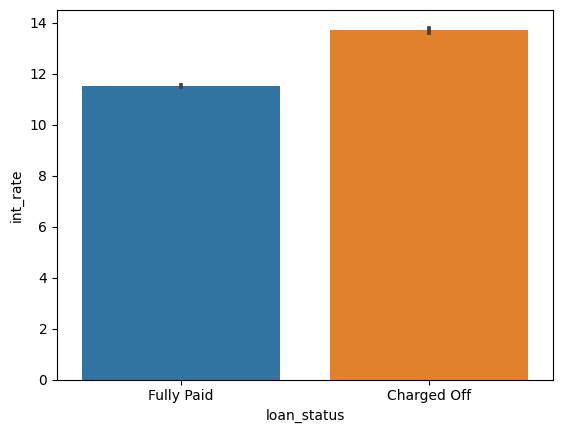

In [42]:
sns.barplot (y=data_loan['int_rate'], x=data_loan['loan_status'])

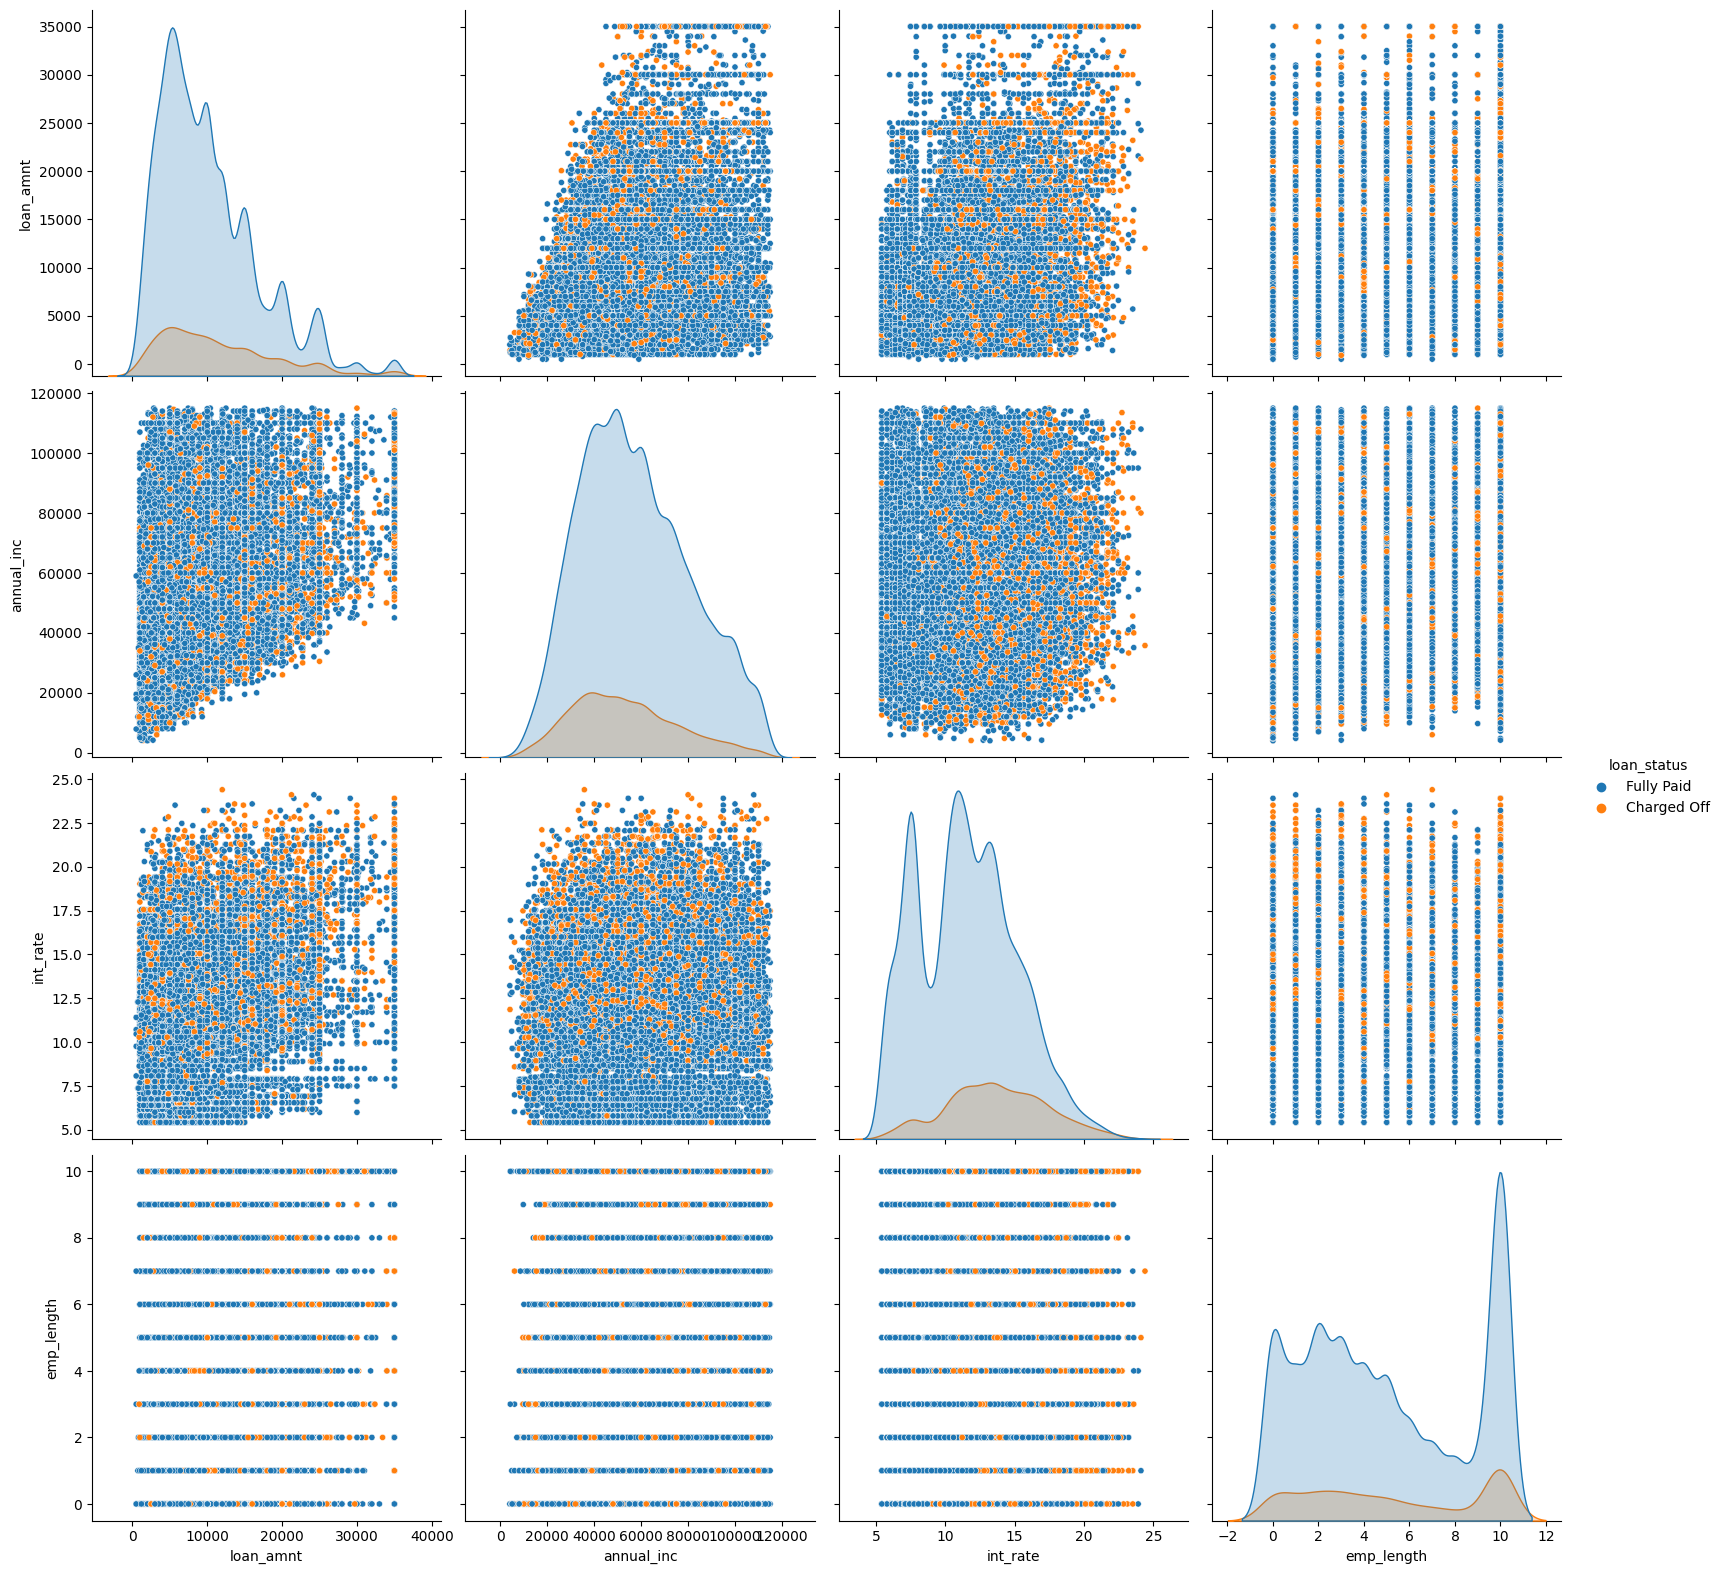

In [43]:
sns.pairplot(pair_data, hue = 'loan_status', diag_kind = 'kde', plot_kws = {'s': 20}, height = 4)